## Практикум 4. Задание.

1. Загрузите файлы из предоставленного архива в единый датафрейм вида: DATE, SBER,
LKOH, GAZP, MOEX, USD0. Где значения в последних пяти колонках являются
значениями курса акций LOW (минимальные значения за день), а значения DATE –
датами с типом TIMESTAMP. Используйте модуль OS.
2. Сделайте DATE – индексом, переиндексируйте на полный период (для этого нужно
восстановить пропущенные даты) и восстановите пропущенные значения в каждом
ряде.
3. Визуализировать линейными графиками в одной фигуре для рисования все ряды.
Используйте метод MATPLOTLIB.PYPLOT.SUBPLOTS.
4. Нормализовать временные ряды и убедиться на визуализации, что они стали
сопоставимы. Используйте деление значений ряда на базовое значение (самое раннее
значение в ряду).
5. Удалить или сгладить аномалии (выбросы) во временных рядах. Используйте
логарифмирование.
6. Удалить тренд и визуализировать линейным графиком. Используйте метод DIFF или
SHIFT.
7. Удалить сезонность в каждом ряде и визуализировать линейным графиком.
Используйте скользящее среднее и метод ROLLING.
8. Выделить тренд, сезонность, остатки, с помощью аддитивной модели: используя
STATSMODELS.TSA.SEASONAL_DECOMPOSE
9. Рассчитать корреляцию между всеми временными рядами (CORR).
10. Построить кластерную карту (SEABORN.CLUSTERMAP) для п.9. вида: корреляция между рядами.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa import seasonal

#### 1. Загрузите файлы из предоставленного архива в единый датафрейм вида: DATE, SBER, LKOH, GAZP, MOEX, USD0. Где значения в последних пяти колонках являются значениями курса акций LOW (минимальные значения за день), а значения DATE – датами с типом TIMESTAMP. Используйте модуль OS.

In [2]:
path = 'data/TS_decomposition'
files = os.listdir(path)
files

['GAZP_200101_240901.txt',
 'USD000000TOD_200101_240901.txt',
 'SBER_200101_240901.txt',
 'LKOH_200101_240901.txt',
 'MOEXOG_200101_240901.txt']

In [3]:
for i, file in enumerate(files):
    if i == 0:
        df = pd.read_csv(os.path.join(path, file), sep=',')[["<DATE>", "<LOW>"]]
        df["<DATE>"] = pd.to_datetime(df["<DATE>"], format='%y%m%d')
        df["<LOW>"] = df["<LOW>"].astype(float)
        df = df.rename(columns={
            "<LOW>": file.split('.')[0].split('_')[0][:4],
            "<DATE>": "DATE"
        })
        df = df.sort_values(by="DATE")
    else:
        new_df = pd.read_csv(os.path.join(path, file), sep=',')[["<DATE>", "<LOW>"]]
        new_df["<DATE>"] = pd.to_datetime(new_df["<DATE>"], format='%y%m%d')
        new_df["<LOW>"] = new_df["<LOW>"].astype(float)
        new_df = new_df.rename(columns={
            "<LOW>": file.split('.')[0].split('_')[0][:4],
            "<DATE>": "DATE"
        })
        new_df = new_df.sort_values(by="DATE")
        df = pd.merge(df, new_df, on="DATE", how="outer")

df.head()

,DATE,GAZP,USD0,SBER,LKOH,MOEX
0,2020-01-03,257.77,NaN,253.70,6185.0,8788.59
1,2020-01-06,254.80,NaN,251.40,6284.5,8827.28
2,2020-01-08,254.77,NaN,253.03,6350.5,8871.71
3,2020-01-09,251.82,61.1075,257.01,6393.5,8913.40
4,2020-01-10,251.20,61.1375,256.88,6395.0,8985.64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1179 non-null   datetime64[ns]
 1   GAZP    1163 non-null   float64       
 2   USD0    1050 non-null   float64       
 3   SBER    1163 non-null   float64       
 4   LKOH    1163 non-null   float64       
 5   MOEX    1161 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 55.4 KB


#### 2. Сделайте DATE – индексом, переиндексируйте на полный период (для этого нужно восстановить пропущенные даты) и восстановите пропущенные значения в каждом ряде.

In [5]:
df = df.set_index("DATE")

In [6]:
df = df.resample('D').asfreq()
df

,GAZP,USD0,SBER,LKOH,MOEX
DATE,,,,,
2020-01-03,257.77,NaN,253.70,6185.0,8788.59
2020-01-04,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN
2020-01-06,254.80,NaN,251.40,6284.5,8827.28
2020-01-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-08-29,123.55,NaN,258.36,6250.5,7336.84
2024-08-30,122.60,NaN,254.00,6118.0,7253.78
2024-08-31,NaN,NaN,NaN,NaN,NaN


In [7]:
df.interpolate(method='linear', inplace=True)
df = df.ffill()
df = df.bfill()
df

,GAZP,USD0,SBER,LKOH,MOEX
DATE,,,,,
2020-01-03,257.770,61.1075,253.700000,6185.000000,8788.590000
2020-01-04,256.780,61.1075,252.933333,6218.166667,8801.486667
2020-01-05,255.790,61.1075,252.166667,6251.333333,8814.383333
2020-01-06,254.800,61.1075,251.400000,6284.500000,8827.280000
2020-01-07,254.785,61.1075,252.215000,6317.500000,8849.495000
...,...,...,...,...,...
2024-08-29,123.550,88.4925,258.360000,6250.500000,7336.840000
2024-08-30,122.600,88.4925,254.000000,6118.000000,7253.780000
2024-08-31,122.210,88.4925,250.216667,6092.166667,7173.980000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1705 entries, 2020-01-03 to 2024-09-02
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GAZP    1705 non-null   float64
 1   USD0    1705 non-null   float64
 2   SBER    1705 non-null   float64
 3   LKOH    1705 non-null   float64
 4   MOEX    1705 non-null   float64
dtypes: float64(5)
memory usage: 79.9 KB


#### 3. Визуализировать линейными графиками в одной фигуре для рисования все ряды. Используйте метод MATPLOTLIB.PYPLOT.SUBPLOTS.

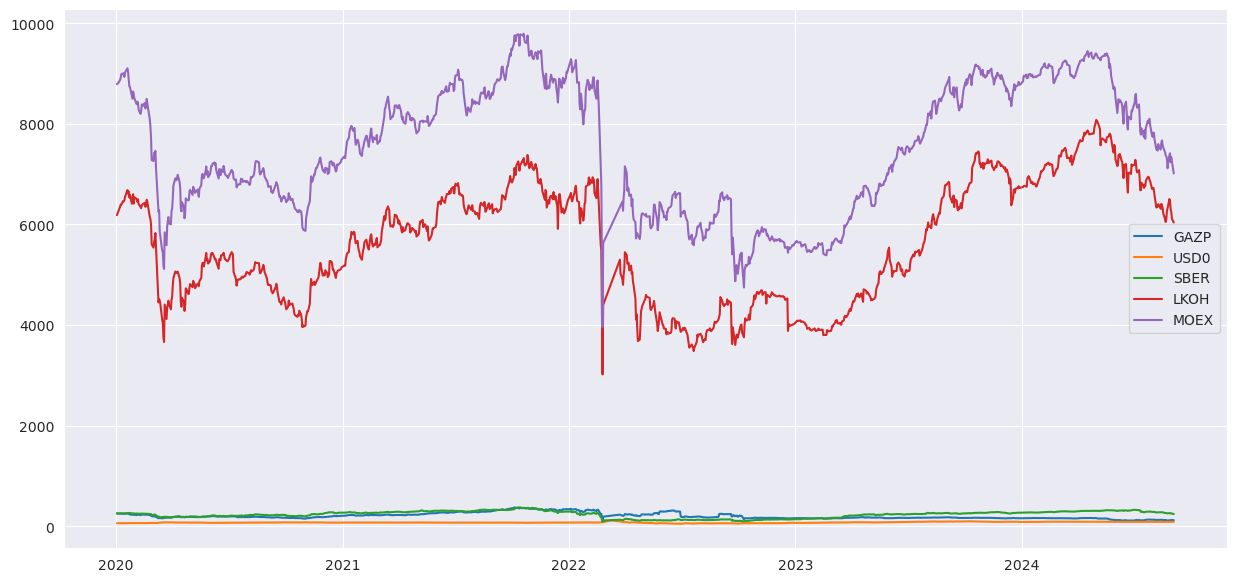

In [9]:
def plot(df: pd.DataFrame) -> None:
    fig, ax = plt.subplots(figsize=(15, 7))
    for column in df.columns:
        ax.plot(df[column], label=column)
    ax.legend()
    plt.show()


plot(df)

#### 4. Нормализовать временные ряды и убедиться на визуализации, что они стали сопоставимы. Используйте деление значений ряда на базовое значение (самое раннее значение в ряду).

In [10]:
df = df / df.iloc[0]
df

,GAZP,USD0,SBER,LKOH,MOEX
DATE,,,,,
2020-01-03,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-04,0.996159,1.000000,0.996978,1.005362,1.001467
2020-01-05,0.992319,1.000000,0.993956,1.010725,1.002935
2020-01-06,0.988478,1.000000,0.990934,1.016087,1.004402
2020-01-07,0.988420,1.000000,0.994147,1.021423,1.006930
...,...,...,...,...,...
2024-08-29,0.479303,1.448145,1.018368,1.010590,0.834814
2024-08-30,0.475618,1.448145,1.001182,0.989167,0.825363
2024-08-31,0.474105,1.448145,0.986270,0.984991,0.816283


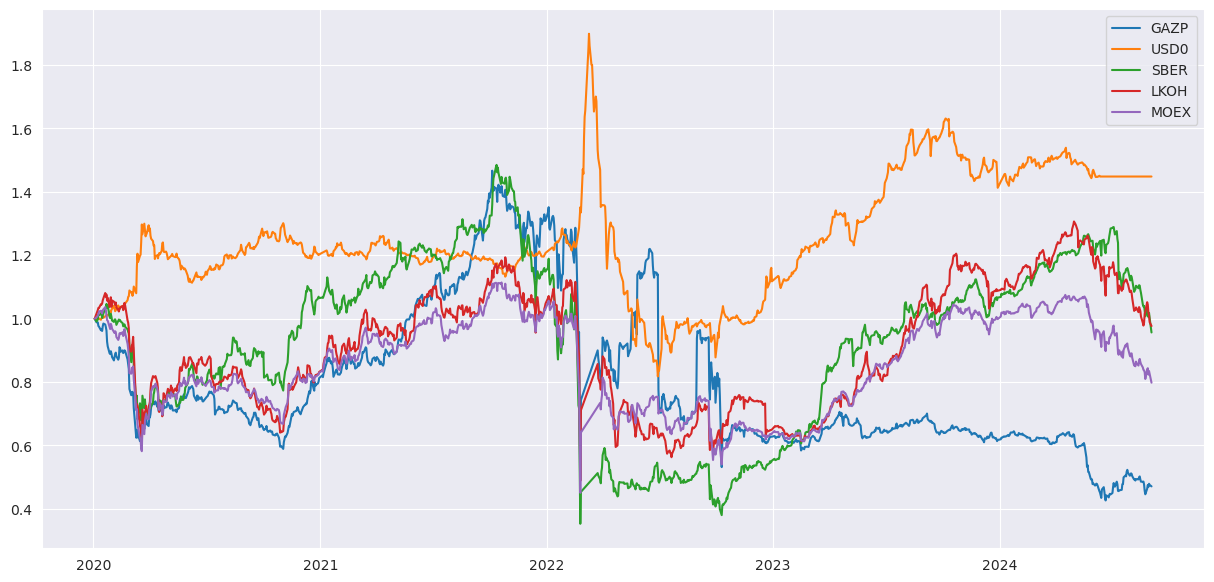

In [11]:
plot(df)

#### 5. Удалить или сгладить аномалии (выбросы) во временных рядах. Используйте логарифмирование.

In [12]:
df = df.apply(lambda x: np.log(x))
df

,GAZP,USD0,SBER,LKOH,MOEX
DATE,,,,,
2020-01-03,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-04,-0.003848,0.000000,-0.003027,0.005348,0.001466
2020-01-05,-0.007711,0.000000,-0.006062,0.010668,0.002931
2020-01-06,-0.011589,0.000000,-0.009107,0.015959,0.004393
2020-01-07,-0.011648,0.000000,-0.005871,0.021197,0.006906
...,...,...,...,...,...
2024-08-29,-0.735422,0.370283,0.018201,0.010534,-0.180546
2024-08-30,-0.743141,0.370283,0.001182,-0.010892,-0.191932
2024-08-31,-0.746327,0.370283,-0.013825,-0.015123,-0.202994


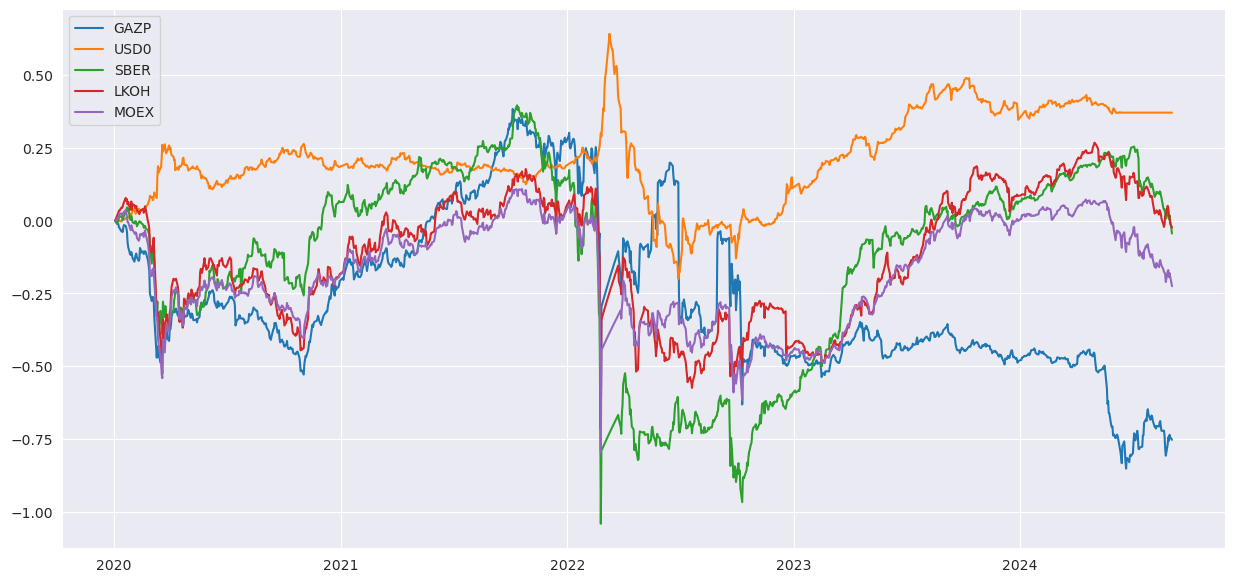

In [13]:
plot(df)

#### 6. Удалить тренд и визуализировать линейным графиком. Используйте метод DIFF или SHIFT.

In [14]:
df.diff().dropna()

,GAZP,USD0,SBER,LKOH,MOEX
DATE,,,,,
2020-01-04,-0.003848,0.0,-0.003027,0.005348,0.001466
2020-01-05,-0.003863,0.0,-0.003036,0.005320,0.001464
2020-01-06,-0.003878,0.0,-0.003045,0.005292,0.001462
2020-01-07,-0.000059,0.0,0.003237,0.005237,0.002513
2020-01-08,-0.000059,0.0,0.003226,0.005210,0.002507
...,...,...,...,...,...
2024-08-29,0.020855,0.0,0.013130,-0.008285,0.013525
2024-08-30,-0.007719,0.0,-0.017020,-0.021426,-0.011386
2024-08-31,-0.003186,0.0,-0.015007,-0.004231,-0.011062


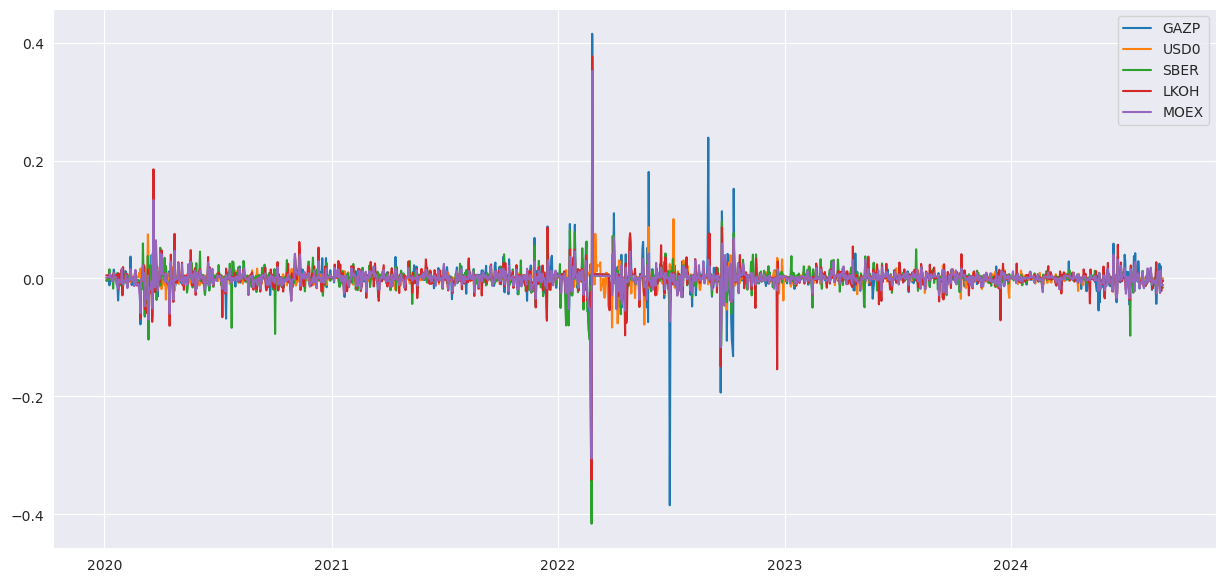

In [15]:
plot(df.diff().dropna())

#### 7. Удалить сезонность в каждом ряде и визуализировать линейным графиком. Используйте скользящее среднее и метод ROLLING.

In [16]:
(df - df.rolling(window=7).mean()).dropna()

,GAZP,USD0,SBER,LKOH,MOEX
DATE,,,,,
2020-01-09,-0.013374,0.000000,0.014927,0.017050,0.008500
2020-01-10,-0.012151,0.000421,0.012641,0.012515,0.013404
2020-01-11,-0.012203,-0.000854,0.010730,0.011631,0.011112
2020-01-12,-0.012287,-0.001929,0.008334,0.010975,0.008918
2020-01-13,-0.012403,-0.002805,0.005454,0.010545,0.006821
...,...,...,...,...,...
2024-08-29,0.034165,0.000000,0.000672,-0.020482,0.007426
2024-08-30,0.017304,0.000000,-0.015473,-0.037267,-0.006672
2024-08-31,0.007278,0.000000,-0.026352,-0.034859,-0.017127


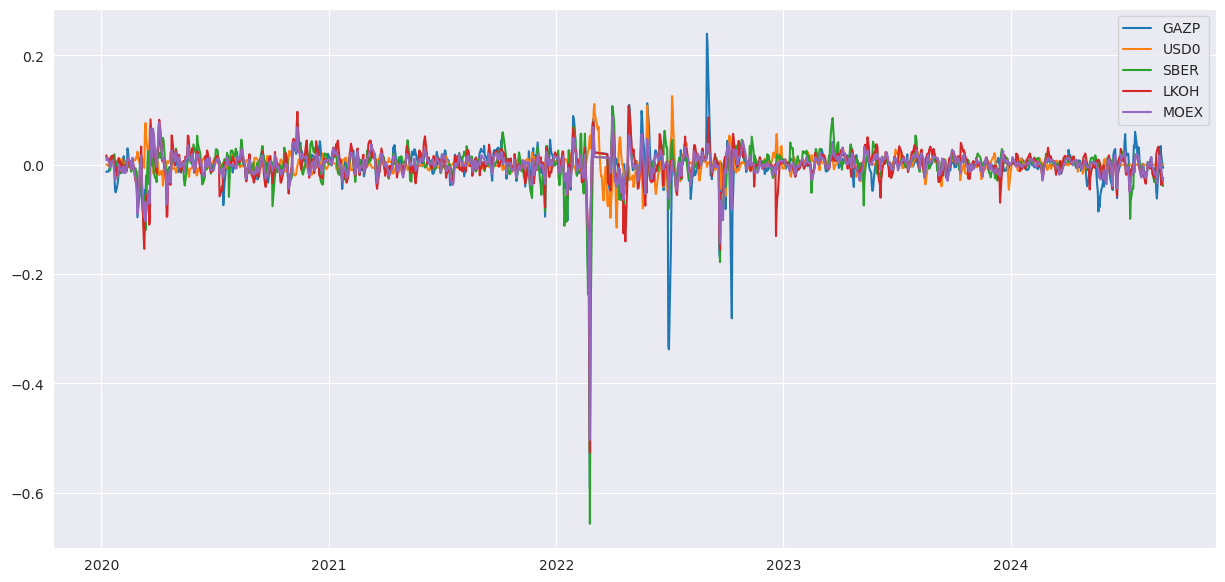

In [17]:
plot((df - df.rolling(window=7).mean()).dropna())

#### 8. Выделить тренд, сезонность, остатки, с помощью аддитивной модели: используя STATSMODELS.TSA.SEASONAL_DECOMPOSE

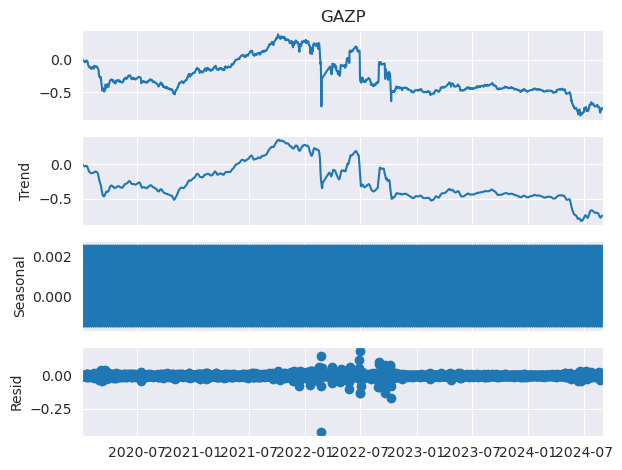

In [18]:
decomposed = seasonal.seasonal_decompose(df["GAZP"], model='additive')
decomposed.plot()
plt.show()

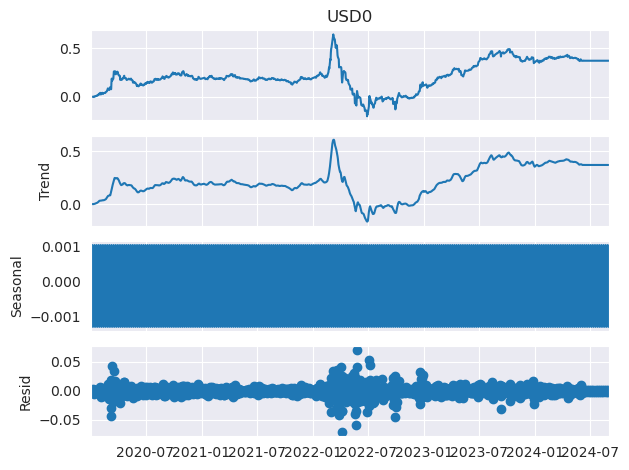

In [19]:
decomposed = seasonal.seasonal_decompose(df["USD0"], model='additive')
decomposed.plot()
plt.show()

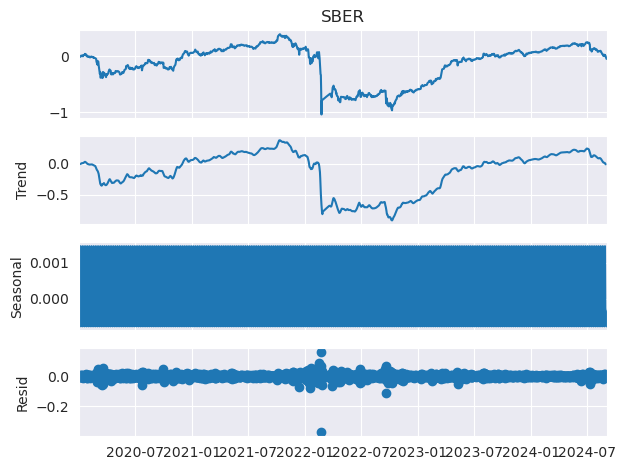

In [20]:
decomposed = seasonal.seasonal_decompose(df["SBER"], model='additive')
decomposed.plot()
plt.show()

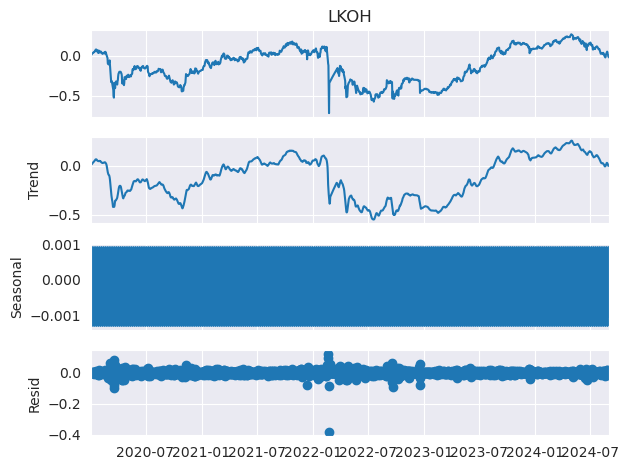

In [21]:
decomposed = seasonal.seasonal_decompose(df["LKOH"], model='additive')
decomposed.plot()
plt.show()

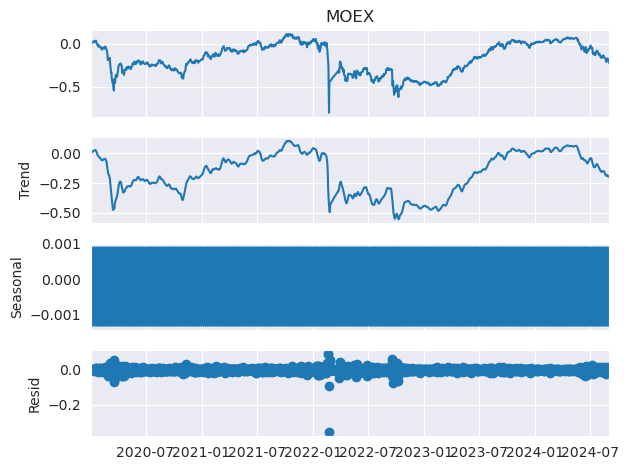

In [22]:
decomposed = seasonal.seasonal_decompose(df["MOEX"], model='additive')
decomposed.plot()
plt.show()

#### 9. Рассчитать корреляцию между всеми временными рядами (CORR).

<Axes: >

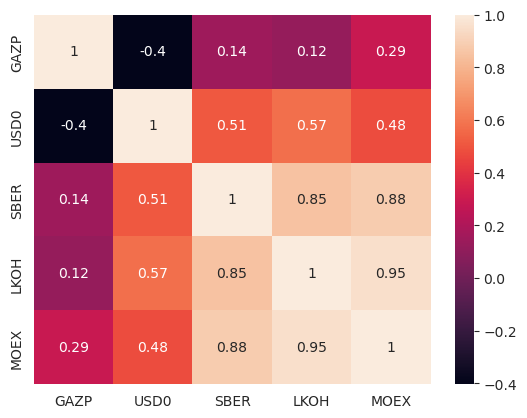

In [23]:
sns.heatmap(df.corr(), annot=True)

#### 10. Построить кластерную карту (SEABORN.CLUSTERMAP) для п.9. вида: корреляция между рядами.

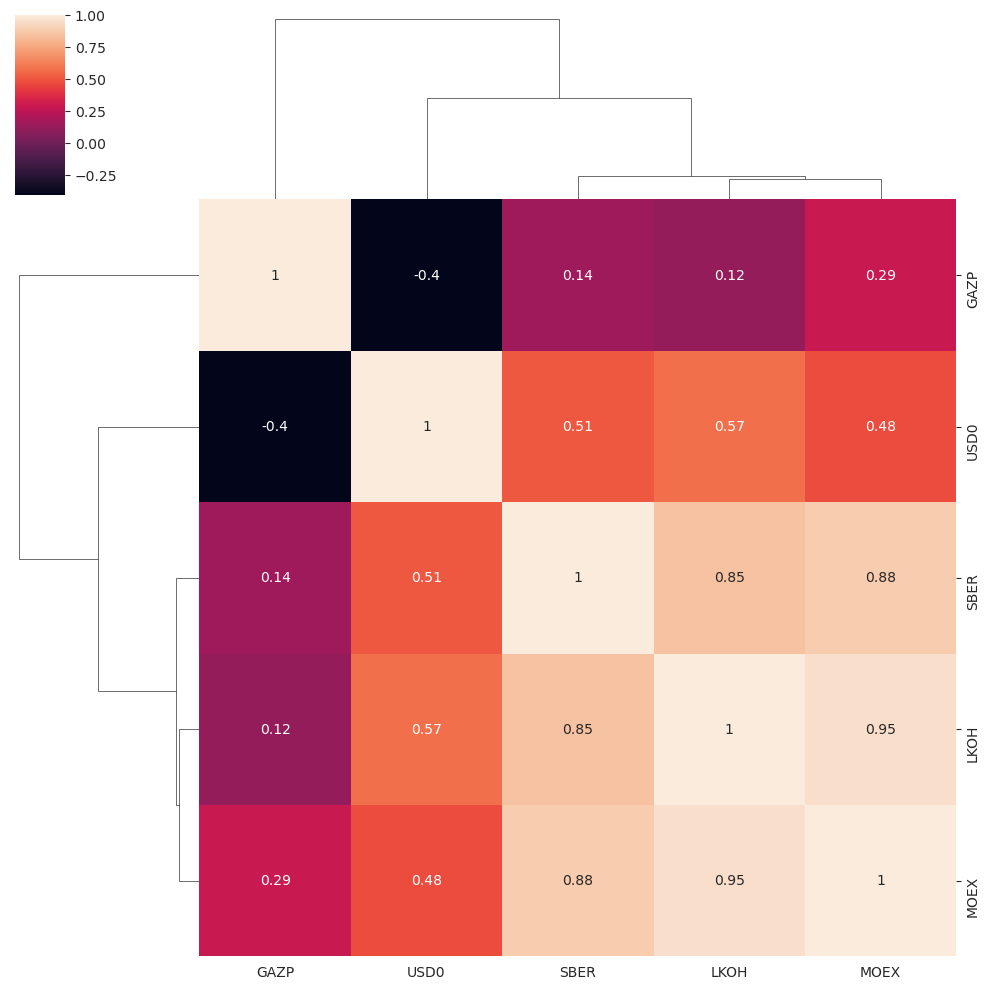

In [24]:
sns.clustermap(df.corr(), annot=True)